In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
import json
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium
print('Libraries imported.')

Libraries imported.


In [5]:
url= 'https://datos.alcobendas.org/dataset/da7fc0b3-31e6-4749-ac02-dab4e19312f0/resource/5b14a79a-9c80-4d5f-9c6a-017c83e5d7fe/download/puntos-de-recarga.csv'
df= pd.read_csv(url)
df.head()

,Titular,Situación,Longitud,Latitud,Número de conectdores,Tipo de conectores,Precio,Cables y adaptadores,Reservar,Horario,Límite de tiempo
0,"ITISFUN, S.L.U",Calle Marqués de la Valdavia 140,-3.656808,40.547812,n/d,n/d,n/d,n/d,n/d,n/d,NaN
1,EMOVILI,Plaza de la Moraleja 9,-3.651422,40.515532,2,TYPE 2 7.40kW,Gratuito,No,No se puede reservar,24 horas todos los días,NaN
2,"NUEVA URBANIZADORA RESIDENCIAL, S.A.",Calle Caléndula 13,-3.647206,40.525138,n/d,n/d,n/d,n/d,n/d,n/d,NaN
3,"CAMINOS DE PASOL, SLU",Camino del Cura 10,-3.645178,40.5081,n/d,NaN,n/d,n/d,n/d,n/d,NaN
4,EMOVILI,Avenida de España 28,-3.641618,40.546535,2,TYPE 2 7.40kW,Gratuito,No,No se puede reservar,24 horas todos los días,2 horas


In [6]:
df1 = df.drop(["Número de conectdores", "Tipo de conectores", "Cables y adaptadores", 'Reservar', 'Límite de tiempo', 'Precio', 'Horario'], axis= 1)
df1 = df1.rename(columns={'Titular':'Nombre de Estación','Situación':'Dirección'})
df1.head()

,Nombre de Estación,Dirección,Longitud,Latitud
0,"ITISFUN, S.L.U",Calle Marqués de la Valdavia 140,-3.656808,40.547812
1,EMOVILI,Plaza de la Moraleja 9,-3.651422,40.515532
2,"NUEVA URBANIZADORA RESIDENCIAL, S.A.",Calle Caléndula 13,-3.647206,40.525138
3,"CAMINOS DE PASOL, SLU",Camino del Cura 10,-3.645178,40.5081
4,EMOVILI,Avenida de España 28,-3.641618,40.546535


Text(0.5, 0, 'Longitud')

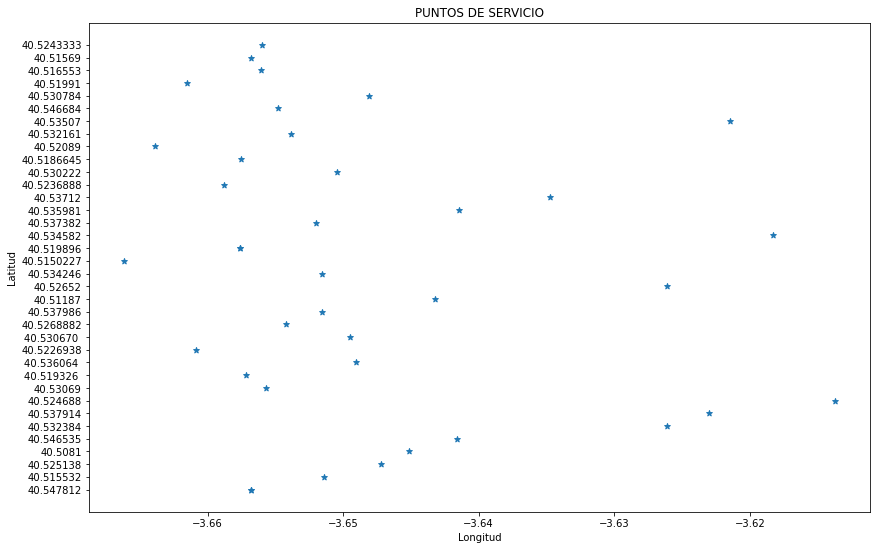

In [7]:
X= df1['Longitud']
Y= df1['Latitud']
plt.figure(figsize=(14, 9))
plt.scatter(X, Y, marker='*')
plt.title('PUNTOS DE SERVICIO')
plt.ylabel('Latitud')
plt.xlabel('Longitud')

In [8]:
df2 = df1[['Longitud','Latitud']]
df2

,Longitud,Latitud
0,-3.656808,40.547812
1,-3.651422,40.515532
2,-3.647206,40.525138
3,-3.645178,40.5081
4,-3.641618,40.546535
5,-3.626132,40.532384
6,-3.623017,40.537914
7,-3.613768,40.524688
8,-3.655690,40.53069
9,-3.657155,40.519326


In [9]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(df2)

KMeans(n_clusters=4, n_init=12)

In [10]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 3, 1, 0, 2, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 1, 1, 1, 2,
       3, 3, 2, 0, 1, 3, 1, 1, 3, 2, 0, 3, 1, 1, 1, 1])

In [11]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-3.652501  , 40.54721075],
       [-3.65665443, 40.51813774],
       [-3.62336257, 40.53261114],
       [-3.65039056, 40.53235102]])

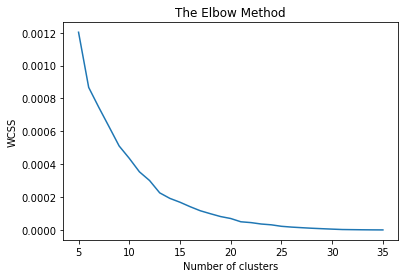

In [18]:
wcss = []
for i in range(5, 36):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(5, 36), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
X1 = np.asarray(X)
X1

array([-3.656808 , -3.651422 , -3.647206 , -3.645178 , -3.641618 ,
       -3.626132 , -3.623017 , -3.613768 , -3.65569  , -3.657155 ,
       -3.649032 , -3.6608542, -3.64952  , -3.6541821, -3.65155  ,
       -3.64323  , -3.62615  , -3.651594 , -3.6661338, -3.65764  ,
       -3.65764  , -3.618301 , -3.6519976, -3.641489 , -3.63473  ,
       -3.656808 , -3.6587782, -3.65044  , -3.6575428, -3.6639   ,
       -3.653871 , -3.62144  , -3.65477  , -3.648115 , -3.66149  ,
       -3.656073 , -3.65682  , -3.6559595])

In [19]:
k_means.fit(df2)

KMeans(n_clusters=4, n_init=12)

In [20]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 0, 2, 0, 3, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       2, 2, 1, 3, 0, 2, 0, 0, 2, 1, 3, 2, 0, 0, 0, 0])

In [21]:
address = 'Madrid, Spain'
geolocator = Nominatim(user_agent="sr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


In [22]:
Spain_map = folium.Map(location=[latitude, longitude], zoom_start=6.4)
Spain_map

In [35]:
Spain_map = folium.Map(location=[latitude, longitude], tiles= 'OpenStreetMap', zoom_start= 11)
Spain_map

In [39]:
estaciones = folium.map.FeatureGroup()
for lat, lng, in zip(Y, X):
    estaciones.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
latitudes = list(Y)
longitudes = list(X)
labels = list(df1['Nombre de Estación'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Spain_map)    

Spain_map.add_child(estaciones)

In [49]:
from folium import plugins

latitude=40.5
longitude= -3.71
Spain_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
estaciones = plugins.MarkerCluster().add_to(Spain_map)

for lat, lng, label, in zip(Y, X, df1['Nombre de Estación']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(estaciones)

Spain_map

In [85]:
CLIENT_ID = 'MEUKSJPPK0EW3ES4RETNW2NY2FMKLRUDB3JF2YELOGC2B0N5' # your Foursquare ID
CLIENT_SECRET = 'Z35FJF10S1EBAENFBUV5RMD0G02SIJBZELFTRFTZF3GNGTVJ' # your Foursquare Secret
ACCESS_TOKEN = 'SS4PIKLK35BLK4O5I35ECVFEVDZAA4F1Y3Y5E4YWPLAMY5CU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MEUKSJPPK0EW3ES4RETNW2NY2FMKLRUDB3JF2YELOGC2B0N5
CLIENT_SECRET:Z35FJF10S1EBAENFBUV5RMD0G02SIJBZELFTRFTZF3GNGTVJ


In [86]:
address = 'Madrid, Spain'
geolocator = Nominatim(user_agent="sr_agent")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print(latitude1, longitude1)

40.4167047 -3.7035825


In [96]:
search_query = 'car'
radius = 500
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
print(url)
results = requests.get(url).json()
print(results)

car .... OK!
https://api.foursquare.com/v2/venues/search?client_id=MEUKSJPPK0EW3ES4RETNW2NY2FMKLRUDB3JF2YELOGC2B0N5&client_secret=Z35FJF10S1EBAENFBUV5RMD0G02SIJBZELFTRFTZF3GNGTVJ&ll=40.5,-3.7035825&oauth_token=SS4PIKLK35BLK4O5I35ECVFEVDZAA4F1Y3Y5E4YWPLAMY5CU&v=20180604&query=car&radius=500&limit=30
{'meta': {'code': 200, 'requestId': '60eb47c319f1ea55dd6fb5e9'}, 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}], 'response': {'venues': [{'id': '55d74f8d498ec4a70f6d0be8', 'name': 'Carpa roja (fun bar)', 'location': {'lat': 40.50241, 'lng': -3.710275, 'labeledLatLngs': [{'label': 'display', 'lat': 40.50241, 'lng': -3.710275}], 'distance': 626, 'cc': 'ES', 'country': 'España', 'formattedAddress': ['España']}, 'categories': [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}], 'referral

In [97]:
venues = results['response']['venues']
df3 = json_normalize(venues)
df3

<ipython-input-97-a92ab9dccd35>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df3 = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state
0,55d74f8d498ec4a70f6d0be8,Carpa roja (fun bar),"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1626032067,False,40.502410,-3.710275,"[{'label': 'display', 'lat': 40.50241, 'lng': ...",626,ES,España,[España],NaN,NaN,NaN,NaN
1,55d74f6d498eaf06acaa3e57,Carpa blanca (funbar),"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1626032067,False,40.502448,-3.710268,"[{'label': 'display', 'lat': 40.502448, 'lng':...",628,ES,España,[España],NaN,NaN,NaN,NaN
2,531a208a498e8d215e3f850f,MCM Cars 25,"[{'id': '4eb1c1623b7b52c0e1adc2ec', 'name': 'A...",v-1626032067,False,40.504353,-3.699702,"[{'label': 'display', 'lat': 40.50435304600543...",585,ES,España,"[Calle Monasterio De El Paular 154, 28029 Madr...",Calle Monasterio De El Paular 154,28029,Madrid,Madrid
3,4da6d8084b22cb9c5c15eb44,Fundación Carmen Pardo-Valcarce,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1626032067,False,40.502493,-3.710200,"[{'label': 'display', 'lat': 40.50249295509785...",625,ES,España,"[Madrid Madrid, España]",NaN,NaN,Madrid,Madrid


In [98]:
filtered_columns = ['name', 'categories'] + [col for col in df3.columns if col.startswith('location.')] + ['id']
df4 = df3.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df4['categories'] = df4.apply(get_category_type, axis=1)
df4.columns = [column.split('.')[-1] for column in df4.columns]
df4

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,state,id
0,Carpa roja (fun bar),Breakfast Spot,40.502410,-3.710275,"[{'label': 'display', 'lat': 40.50241, 'lng': ...",626,ES,España,[España],NaN,NaN,NaN,NaN,55d74f8d498ec4a70f6d0be8
1,Carpa blanca (funbar),Restaurant,40.502448,-3.710268,"[{'label': 'display', 'lat': 40.502448, 'lng':...",628,ES,España,[España],NaN,NaN,NaN,NaN,55d74f6d498eaf06acaa3e57
2,MCM Cars 25,Auto Dealership,40.504353,-3.699702,"[{'label': 'display', 'lat': 40.50435304600543...",585,ES,España,"[Calle Monasterio De El Paular 154, 28029 Madr...",Calle Monasterio De El Paular 154,28029,Madrid,Madrid,531a208a498e8d215e3f850f
3,Fundación Carmen Pardo-Valcarce,Building,40.502493,-3.710200,"[{'label': 'display', 'lat': 40.50249295509785...",625,ES,España,"[Madrid Madrid, España]",NaN,NaN,Madrid,Madrid,4da6d8084b22cb9c5c15eb44


In [99]:
venues_map = folium.Map(location=[latitude1, longitude1], zoom_start=11) # generate map centred around the Conrad Hotel

for lat, lng, label in zip(df4.lat, df4.lng, df4.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map